In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [79]:
# Load diabetes dataset
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [80]:
# Decode admission_type_id
admission_type_dict = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: np.nan,
    7: 'Trauma Center',
    8: 'Not Mapped'
}
data['admission_type_id'] = data['admission_type_id'].map(admission_type_dict)


In [81]:
discharge_disposition_dict={
    1:'Discharged to home',
    2:'Discharged/transferred to another short term hospital',
    3:'Discharged/transferred to SNF',
    4:'Discharged/transferred to ICF',
    5:'Discharged/transferred to another type of inpatient care institution',
    6:'Discharged/transferred to home with home health service',
    7:'Left AMA',
    8:'Discharged/transferred to home under care of Home IV provider',
    9:'Admitted as an inpatient to this hospital',
    10:'Neonate discharged to another hospital for neonatal aftercare',
    11:'Expired',
    12:'Still patient or expected to return for outpatient services',
    13:'Hospice / home',
    14:'Hospice / medical facility',
    15:'Discharged/transferred within this institution to Medicare approved swing bed',
    16:'Discharged/transferred/referred another institution for outpatient services',
    17:'Discharged/transferred/referred to this institution for outpatient services',
    18:np.nan,
    19:'Expired at home. Medicaid only, hospice.',
    20:'Expired in a medical facility. Medicaid only, hospice.',
    21:'Expired, place unknown. Medicaid only, hospice.',
    22:'Discharged/transferred to another rehab fac including rehab units of a hospital .',
    23:'Discharged/transferred to a long term care hospital.',
    24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25:'Not Mapped',
    26:'Unknown/Invalid',
    30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    27:'Discharged/transferred to a federal health care facility.',
    28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29:'Discharged/transferred to a Critical Access Hospital (CAH).',
}
data['discharge_disposition_id']  = data['discharge_disposition_id'].map(discharge_disposition_dict)

In [82]:
# Decode admission_source_id
admission_source_dict={
    1:'Physician Referral',
    2:'Clinic Referral',
    3:'HMO Referral',
    4:'Transfer from a hospital',
    5:'Transfer from a Skilled Nursing Facility (SNF)',
    6:'Transfer from another health care facility',
    7:'Emergency Room',
    8:'Court/Law Enforcement',
    9:'Not Available',
    10:'Transfer from critial access hospital',
    11:'Normal Delivery',
    12:'Premature Delivery',
    13:'Sick Baby',
    14:'Extramural Birth',
    15:'Not Available',
    17:np.nan,
    18:'Transfer From Another Home Health Agency',
    19:'Readmission to Same Home Health Agency',
    20:'Not Mapped',
    21:'Unknown/Invalid',
    22:'Transfer from hospital inpt/same fac reslt in a sep claim',
    23:'Born inside this hospital',
    24:'Born outside this hospital',
    25:'Transfer from Ambulatory Surgery Center',
    26:'Transfer from Hospice',
}
data['admission_source_id'] = data['admission_source_id'].map(admission_source_dict)

In [83]:
# Display decoded categorical fields
print(data[['admission_type_id','discharge_disposition_id','admission_source_id']])


       admission_type_id       discharge_disposition_id  \
0                    NaN                     Not Mapped   
1              Emergency             Discharged to home   
2              Emergency             Discharged to home   
3              Emergency             Discharged to home   
4              Emergency             Discharged to home   
...                  ...                            ...   
101761         Emergency  Discharged/transferred to SNF   
101762         Emergency  Discharged/transferred to ICF   
101763         Emergency             Discharged to home   
101764            Urgent  Discharged/transferred to SNF   
101765         Emergency             Discharged to home   

                                   admission_source_id  
0                                   Physician Referral  
1                                       Emergency Room  
2                                       Emergency Room  
3                                       Emergency Room  
4     

In [84]:
# Replace '?' with NaN values
data.replace('?',np.nan,inplace=True)

In [85]:
# Display count of null values in each column
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id            5291
discharge_disposition_id     3691
admission_source_id          6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [86]:
# Drop weight column (98% missing values)
data.drop(columns=['weight'],inplace=True)


In [87]:
# Check race distribution
print(data['race'].value_counts(normalize=True))


race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: proportion, dtype: float64


In [88]:
# Handle missing values for each column
data['race'] = data['race'].fillna(data['race'].mode()[0])  # Fill with mode
data['A1Cresult'] = data['A1Cresult'].fillna('not measured')  # Medical test results
data['max_glu_serum'] = data['max_glu_serum'].fillna('not measured')
data['payer_code'] = data['payer_code'].fillna('unknown')
data['medical_specialty'] = data['medical_specialty'].fillna('unknown')
data['diag_2'] = data['diag_2'].fillna("NO_SECONDARY_DX")  # Secondary diagnosis
data['diag_3'] = data['diag_3'].fillna("NO_TERTIARY_DX")  # Tertiary diagnosis
data['admission_type_id'] = data['admission_type_id'].fillna('Not Available')
data['discharge_disposition_id'] = data['discharge_disposition_id'].fillna('Not Available')
data['admission_source_id'] = data['admission_source_id'].fillna('Not Available')


In [89]:
# Remove rows with missing primary diagnosis (critical field)
data.dropna(subset=['diag_1'], inplace=True)

In [90]:

# Verify all nulls are handled
print(data.isnull().sum())


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [91]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Not Available,Not Mapped,Physician Referral,1,unknown,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,unknown,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,unknown,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,unknown,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Key Findings from Exploratory Data Analysis

### Readmission percentage 

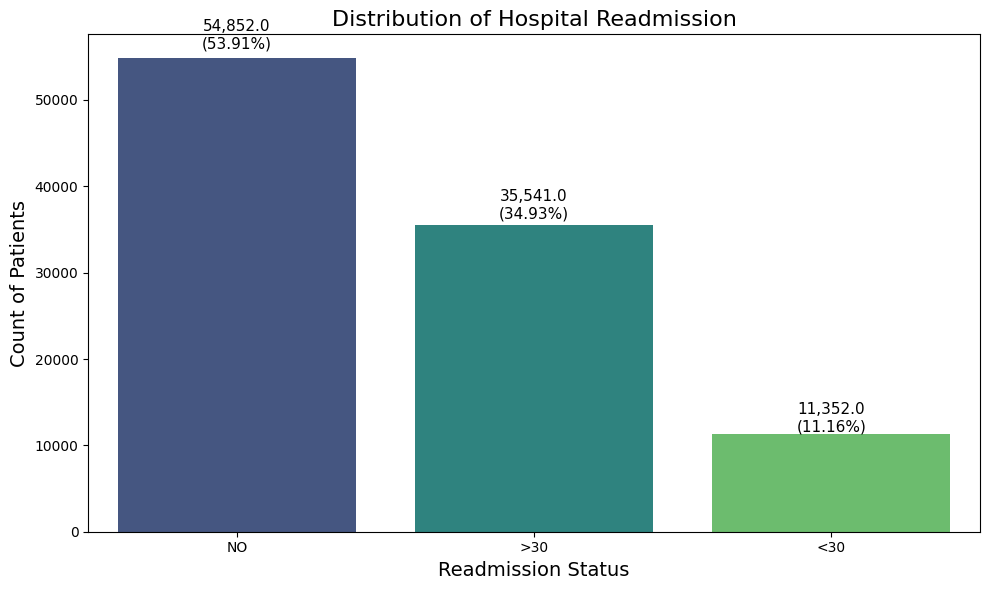

In [92]:
data['readmitted_binary'] = (data['readmitted'] == '<30').astype(int)

# Analyzing the target variable 'readmitted'
readmitted_counts = data['readmitted'].value_counts()
readmitted_percent = (data['readmitted'].value_counts(normalize=True) * 100).round(2)

# Summary dataframe
readmission_summary = pd.DataFrame({
    'Count': readmitted_counts,
    'Percentage (%)': readmitted_percent
})


# visual representation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='readmitted', data=data, hue='readmitted', palette='viridis', legend=False)
# Adding count and percentage labels to the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = readmitted_percent.iloc[i] if i < len(readmitted_percent) else 0
    ax.annotate(f"{height:,}\n({percentage}%)", 
                (p.get_x() + p.get_width() / 2., height * 1.02),
                ha='center', va='baseline', fontsize=11)

plt.title('Distribution of Hospital Readmission', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.tight_layout()
plt.show()



### Admission type with regards to readmission column  

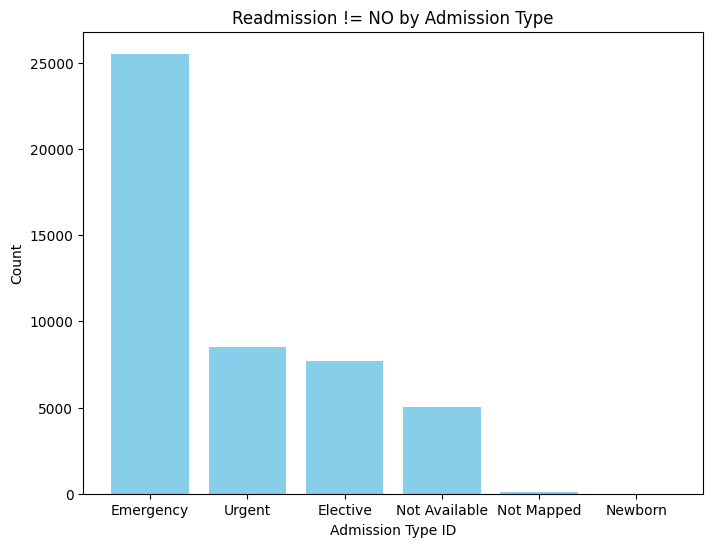

In [93]:
# Count the number of not 'NO' readmissions by admission type
anytarget= data[data["readmitted"]!="NO"]
count_by_admission = anytarget['admission_type_id'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(count_by_admission.index.astype(str), count_by_admission.values, color='skyblue')
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Readmission != NO by Admission Type')
plt.show()


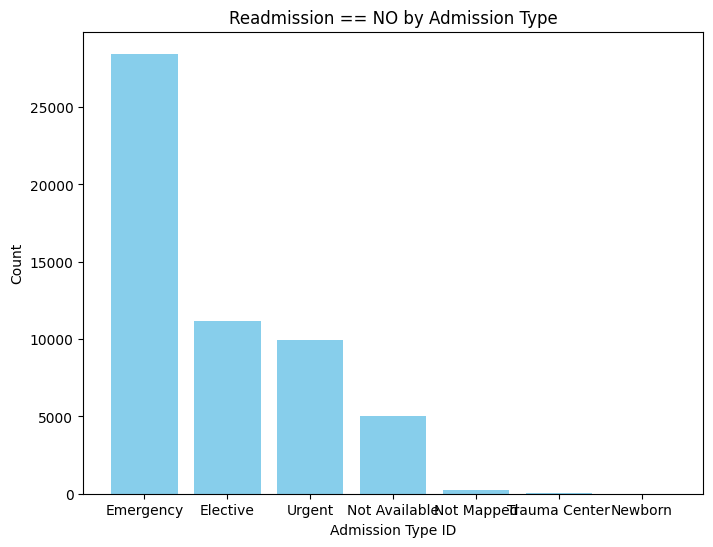

In [94]:
# Count the number of not 'NO' readmissions by admission type
notarget= data[data["readmitted"]=="NO"]
count_by_admission = notarget['admission_type_id'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(count_by_admission.index.astype(str), count_by_admission.values, color='skyblue')
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Readmission == NO by Admission Type')
plt.show()


### Age ranges of patients 

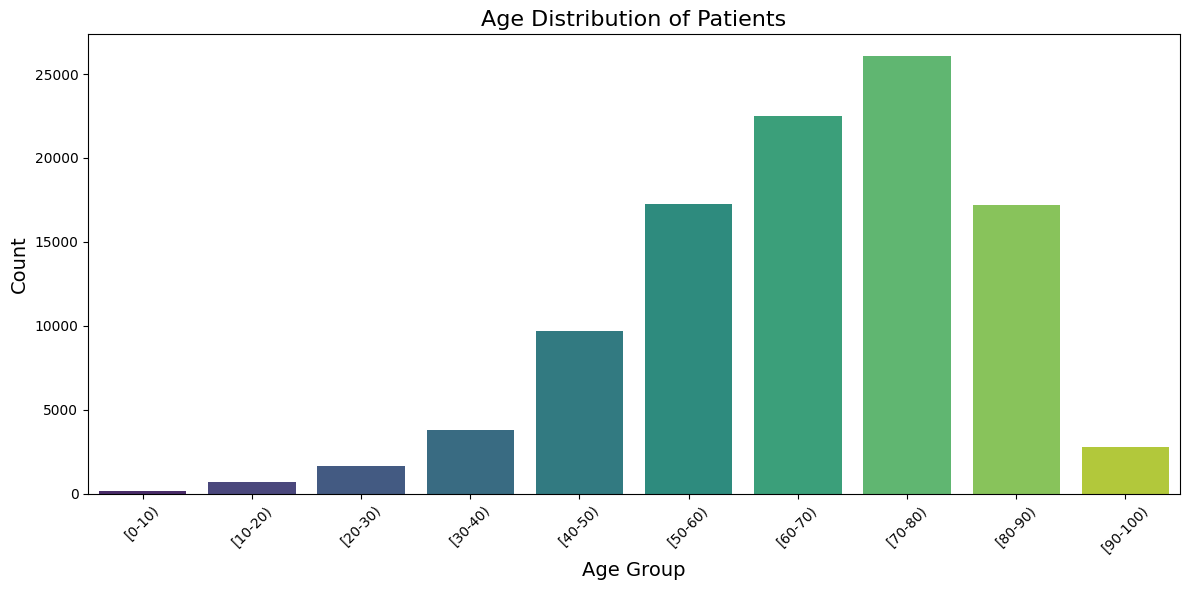

In [95]:
plt.figure(figsize=(12, 6))
age_counts = data['age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='viridis',legend=False )
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender of patients

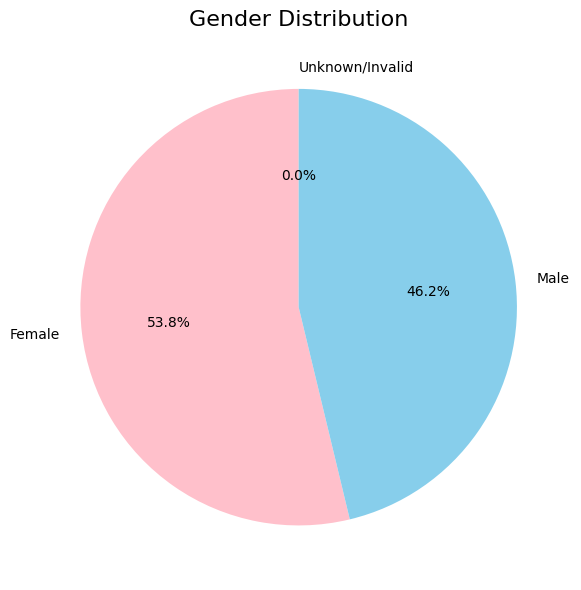

In [96]:
# Analyzing gender distribution
plt.figure(figsize=(10, 6))
gender_counts = data['gender'].value_counts()
# the different numbers of gender categories handling
#explode = [0.2] + [0] * (len(gender_counts) - 1)  # Explode the first piece (largest)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['pink', 'skyblue', 'lightgreen'][:len(gender_counts)])
plt.title('Gender Distribution', fontsize=16)
plt.tight_layout()
plt.show()


### Race of patients

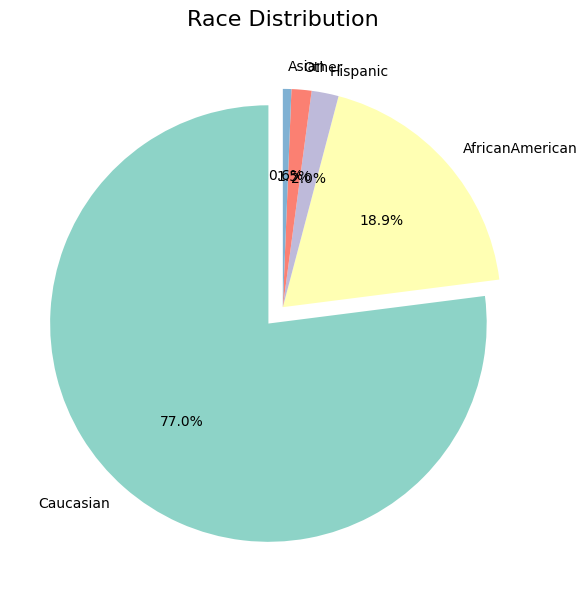

In [97]:
# Analyzing race distribution
plt.figure(figsize=(10, 6))
race_counts = data['race'].value_counts()
explode = [0.1] + [0] * (len(race_counts) - 1)  # Explode the largest piece

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, colors=sns.color_palette('Set3', len(race_counts)))
plt.title('Race Distribution', fontsize=16)
plt.tight_layout()
plt.show()

### Readmission based on the number of stay days

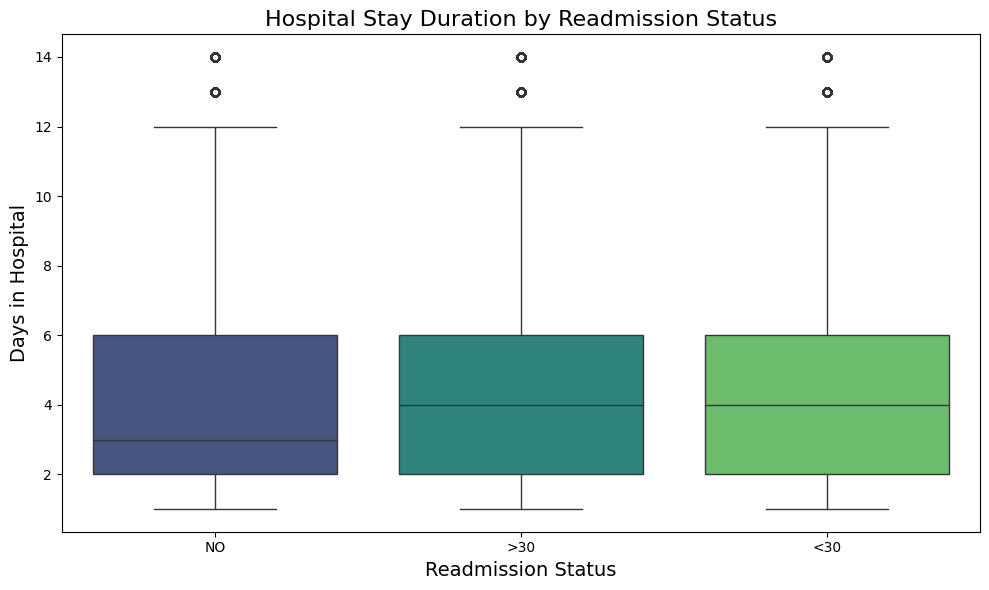

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital',hue="readmitted" ,data=data, palette='viridis', legend= False)
plt.title('Hospital Stay Duration by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Days in Hospital', fontsize=14)
plt.tight_layout()
plt.show()

### Admission types in the hospital 

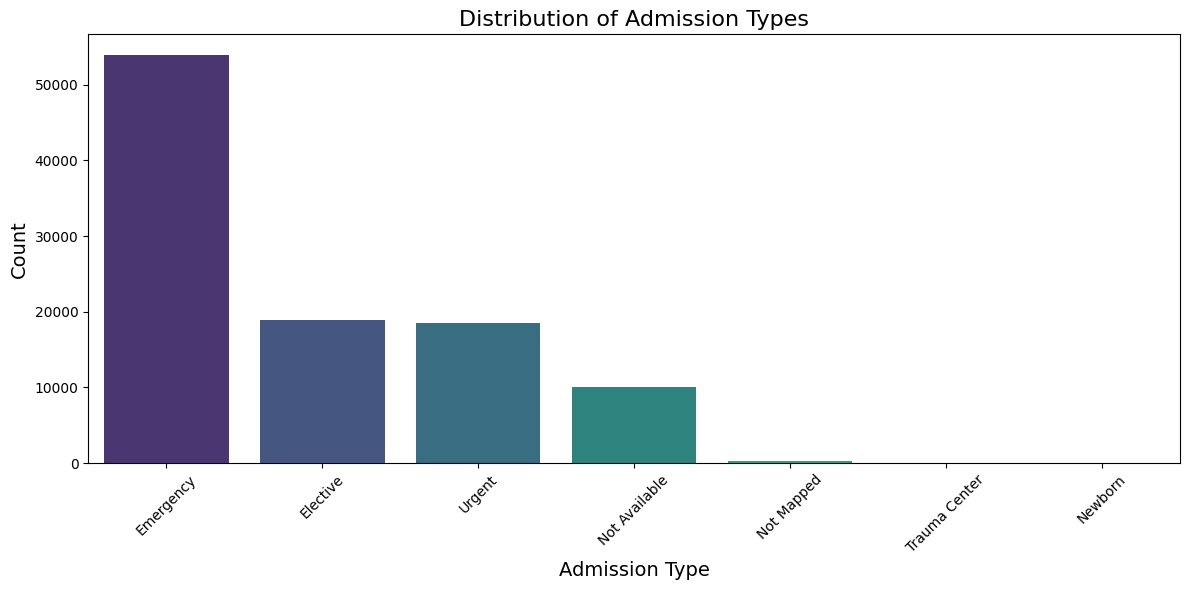

In [99]:
plt.figure(figsize=(12, 6))
admission_counts = data['admission_type_id'].value_counts()
sns.barplot(x=admission_counts.index, y=admission_counts.values,hue=admission_counts.index ,palette='viridis', legend=False)
plt.title('Distribution of Admission Types', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Admission types distribution that get readmitted in less than 30 days


In [100]:
# function to calculate readmission rates by category
def calculate_readmission_rate(df, feature):
    """Calculate readmission rates for each category of a feature"""
    # Counting occurrences for each combination of feature and readmission status
    grouped = df.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    
    # Calculating total count for each category
    grouped['total'] = grouped.sum(axis=1)
    
    # Calculating readmission rates
    grouped['<30_days_rate'] = (grouped['<30'] / grouped['total'] * 100).round(2)
    grouped['>30_days_rate'] = (grouped['>30'] / grouped['total'] * 100).round(2)
    grouped['total_readmission_rate'] = ((grouped['<30'] + grouped['>30']) / grouped['total'] * 100).round(2)
    
    # rates and counts
    return grouped[['<30_days_rate', '>30_days_rate', 'total_readmission_rate', 'total']]

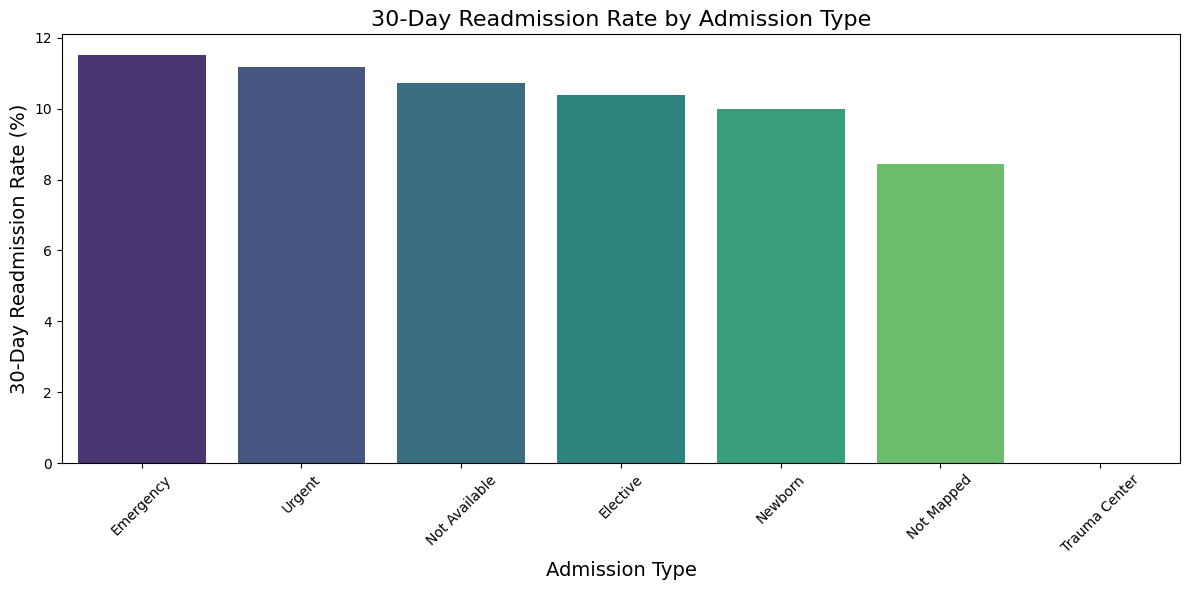

In [101]:
valid_admission = data.dropna(subset=['admission_type_id'])
admission_readmission = calculate_readmission_rate(valid_admission, 'admission_type_id')
admission_readmission = admission_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=admission_readmission.index, y=admission_readmission['<30_days_rate'],hue=admission_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Admission Type', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Readmission rates by admission source


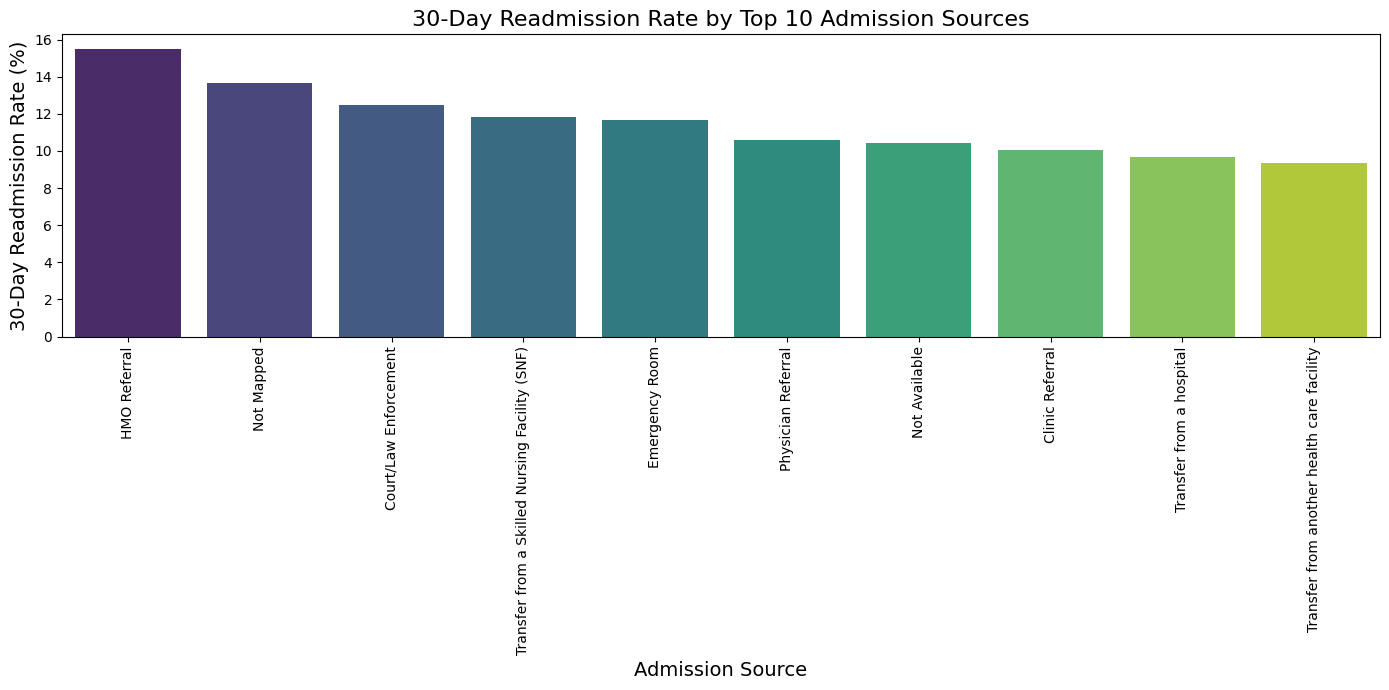

In [102]:
top_sources = data['admission_source_id'].value_counts().nlargest(10).index
source_data = data[data['admission_source_id'].isin(top_sources)]
source_readmission = calculate_readmission_rate(source_data, 'admission_source_id')
source_readmission = source_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=source_readmission.index, y=source_readmission['<30_days_rate'], hue=source_readmission.index,palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Top 10 Admission Sources', fontsize=16)
plt.xlabel('Admission Source', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Seeing the relation between the diagnosis 1 with the readmission before 30 days

In [103]:
def categorize_diagnosis(code):
    if pd.isna(code):  # Handle missing values
        return "Unknown"

    code = str(code).strip()  # Ensure it's a string and remove spaces
    
    # Check if it's a numeric ICD code
    if code.replace(".", "").isdigit():
        code = float(code)  # Convert to float
        if 1 <= code <= 139:
            return "Infectious Diseases"
        elif 140 <= code <= 239:
            return "Cancer & Neoplasms"
        elif 240 <= code <= 279:
            return "Endocrine Disorders"
        elif 280 <= code <= 289:
            return "Blood Disorders"
        elif 290 <= code <= 319:
            return "Mental Health Disorders"
        elif 320 <= code <= 389:
            return "Nervous System Diseases"
        elif 390 <= code <= 459:
            return "Heart & Circulatory Conditions"
        elif 460 <= code <= 519:
            return "Respiratory Diseases"
        elif 520 <= code <= 579:
            return "Digestive System Diseases"
        elif 580 <= code <= 629:
            return "Kidney & Urinary Disorders"
        elif 630 <= code <= 679:
            return "Pregnancy-Related Conditions"
        elif 680 <= code <= 709:
            return "Skin Disorders"
        elif 710 <= code <= 739:
            return "Muscle & Bone Conditions"
        elif 740 <= code <= 759:
            return "Congenital Disorders"
        elif 760 <= code <= 779:
            return "Perinatal Conditions"
        elif 780 <= code <= 799:
            return "Symptoms & Non-Specific Conditions"
        elif 800 <= code <= 999:
            return "Injuries & Poisoning"
        else:
            return "Unknown ICD Code"

    # If it's an alphanumeric V, W, X, or Y code
    elif code.startswith("V"):
        return "External Injury (Vehicle-related)"
    elif code.startswith("W"):
        return "External Injury (Falls, Accidents)"
    elif code.startswith("X"):
        return "External Injury (Poisoning, Assault)"
    elif code.startswith("Y"):
        return "External Injury (Other Causes)"
    else:
        return "Unknown"

# Apply function to the dataset
data["diag_category"] = data["diag_1"].apply(categorize_diagnosis)

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_8824\1102450963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diag_readmission.index, y=diag_readmission['<30_days_rate'], palette='viridis', legend=False)


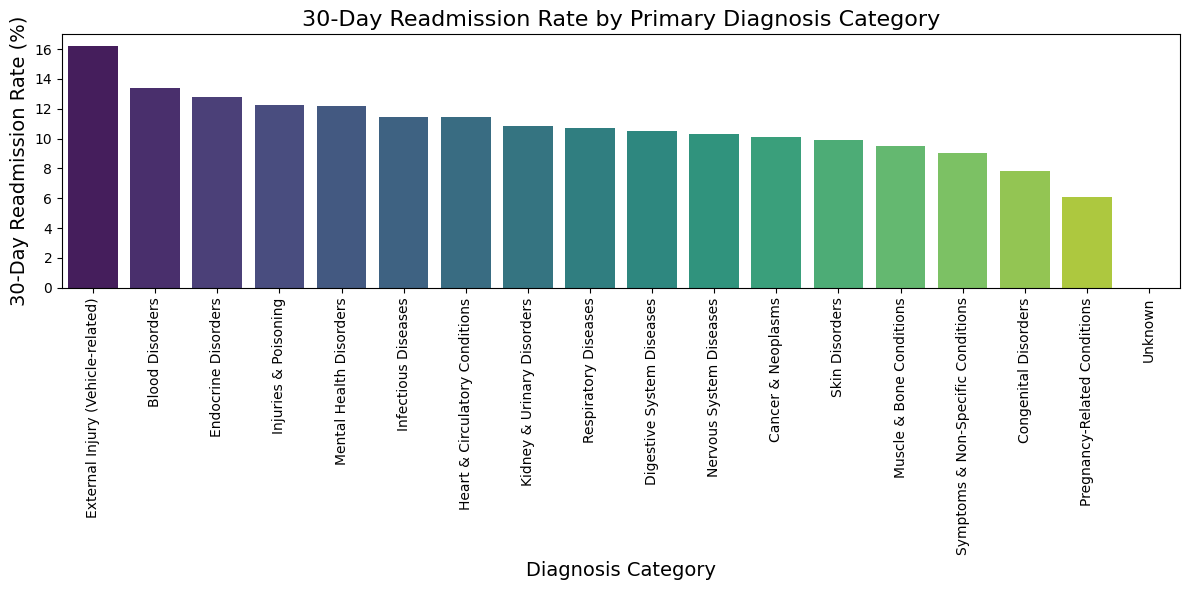

In [104]:
# Calculating readmission rates by primary diagnosis category
diag_readmission = calculate_readmission_rate(data, 'diag_category')
diag_readmission = diag_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=diag_readmission.index, y=diag_readmission['<30_days_rate'], palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Primary Diagnosis Category', fontsize=16)
plt.xlabel('Diagnosis Category', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Seeing relation between number of diagnosises and the readmission

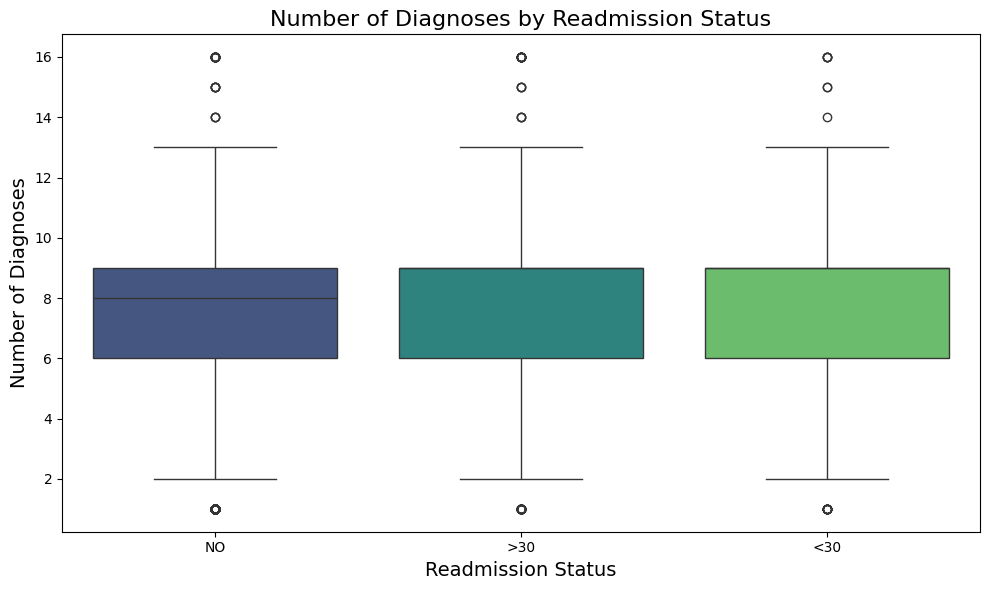

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='number_diagnoses', data=data,hue="readmitted", palette='viridis', legend= False)
plt.title('Number of Diagnoses by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Number of Diagnoses', fontsize=14)
plt.tight_layout()
plt.show()

### Seeing the relation between A1C and readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_8824\3411735104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="A1Cresult", data=filtered_df, palette="viridis")


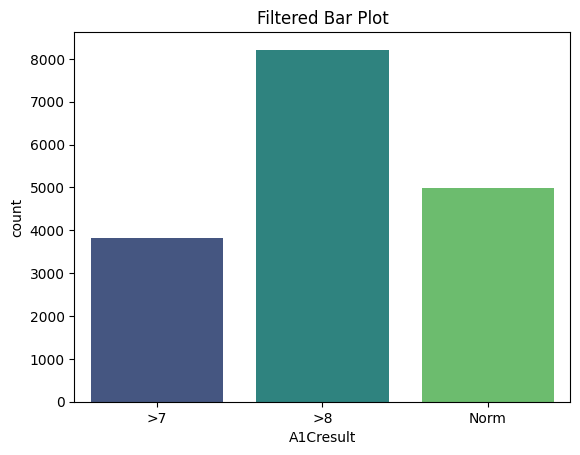

In [106]:

filtered_df = data[data["A1Cresult"] != "not measured"]
a1c_readmission = calculate_readmission_rate(filtered_df, 'A1Cresult')
a1c_readmission = a1c_readmission.sort_values('<30_days_rate', ascending=False)


# Create bar plot
sns.countplot(x="A1Cresult", data=filtered_df, palette="viridis")
plt.xticks(rotation=0) 
plt.title("Filtered Bar Plot")
plt.show()


### Seeing the relation between the glucose serum results and readmission

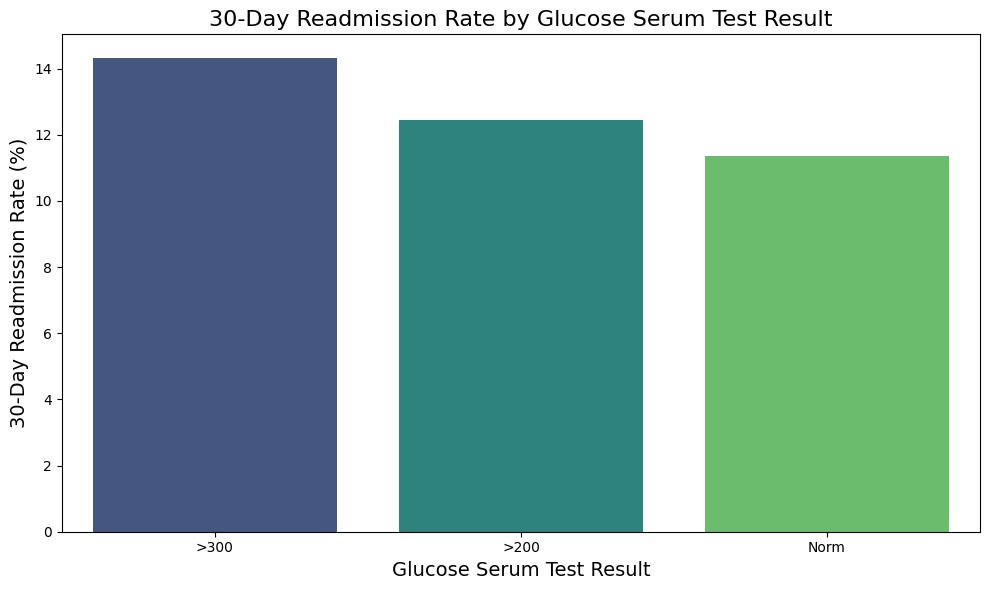

In [107]:
filtered_df = data[data["max_glu_serum"] != "not measured"]
glu_readmission = calculate_readmission_rate(filtered_df, 'max_glu_serum')
glu_readmission = glu_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=glu_readmission.index, y=glu_readmission['<30_days_rate'],hue=glu_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Glucose Serum Test Result', fontsize=16)
plt.xlabel('Glucose Serum Test Result', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()


### Seeing the effect of using a diabetes medication on readmission

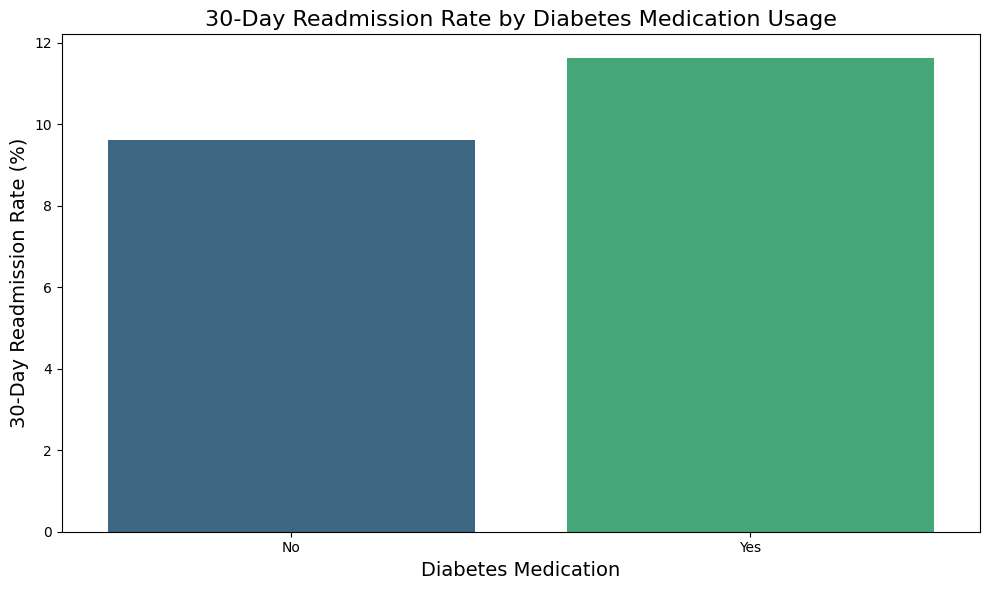

In [108]:
diabetes_med_readmission = calculate_readmission_rate(data, 'diabetesMed')

plt.figure(figsize=(10, 6))
sns.barplot(x=diabetes_med_readmission.index, y=diabetes_med_readmission['<30_days_rate'],hue= diabetes_med_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Diabetes Medication Usage', fontsize=16)
plt.xlabel('Diabetes Medication', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()

plt.show()

### Seeing the effect of changing the medication on readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_8824\724222552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_readmission.index, y=change_readmission['<30_days_rate'], palette='viridis')


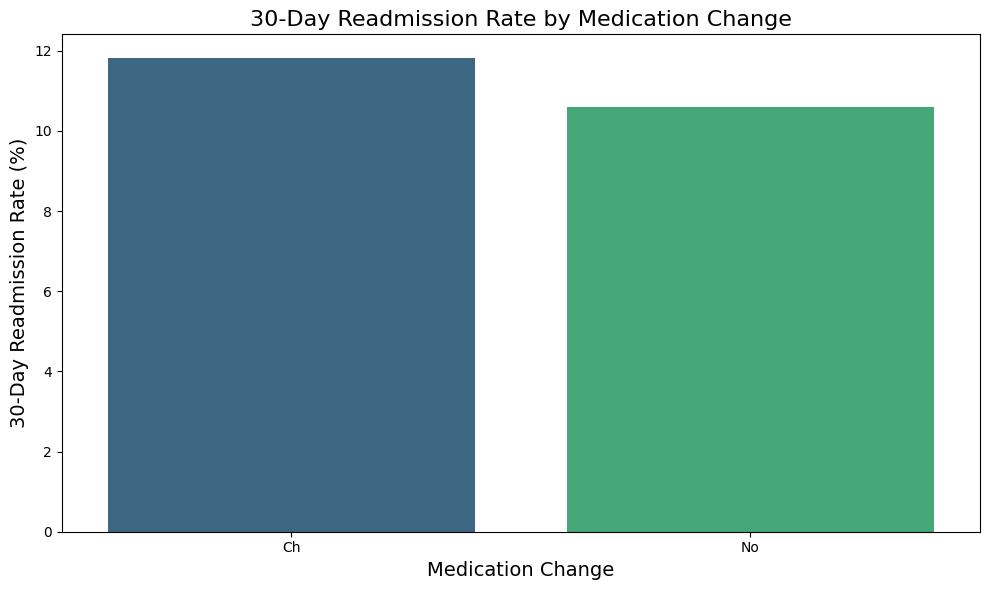

In [109]:
# Calculating readmission rates by medication change
change_readmission = calculate_readmission_rate(data, 'change')

plt.figure(figsize=(10, 6))
sns.barplot(x=change_readmission.index, y=change_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Medication Change', fontsize=16)
plt.xlabel('Medication Change', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

### Seeing the effect of insulin on readmission

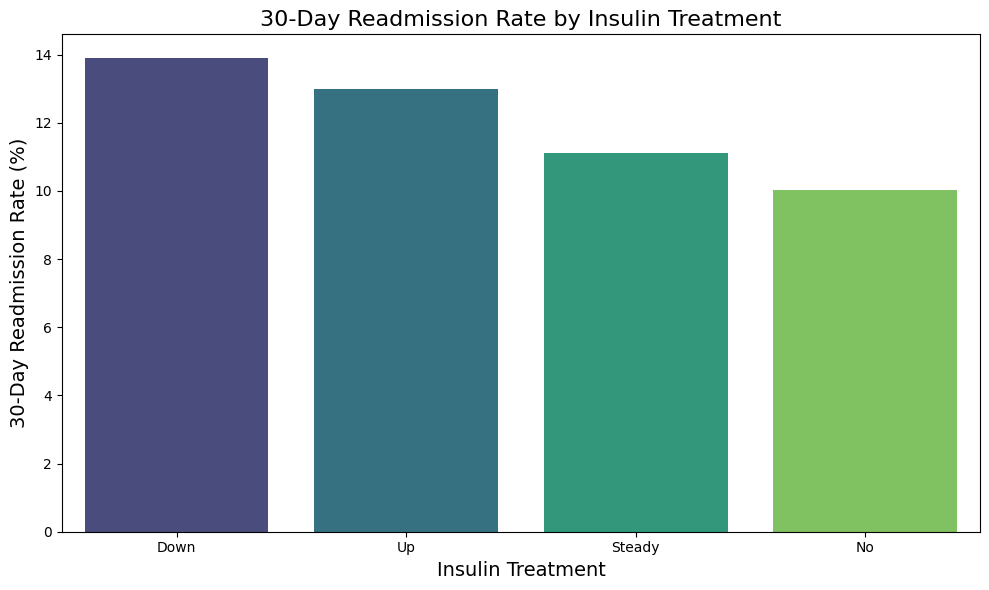

In [110]:
insulin_readmission = calculate_readmission_rate(data, 'insulin')
insulin_readmission = insulin_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=insulin_readmission.index, y=insulin_readmission['<30_days_rate'],hue=insulin_readmission.index, palette='viridis', legend=False)
plt.title('30-Day Readmission Rate by Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()


### Seeing the effect of specific medication on readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_8824\2436674007.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medication', y='Readmission_Rate', data=med_rates_df, palette='viridis')


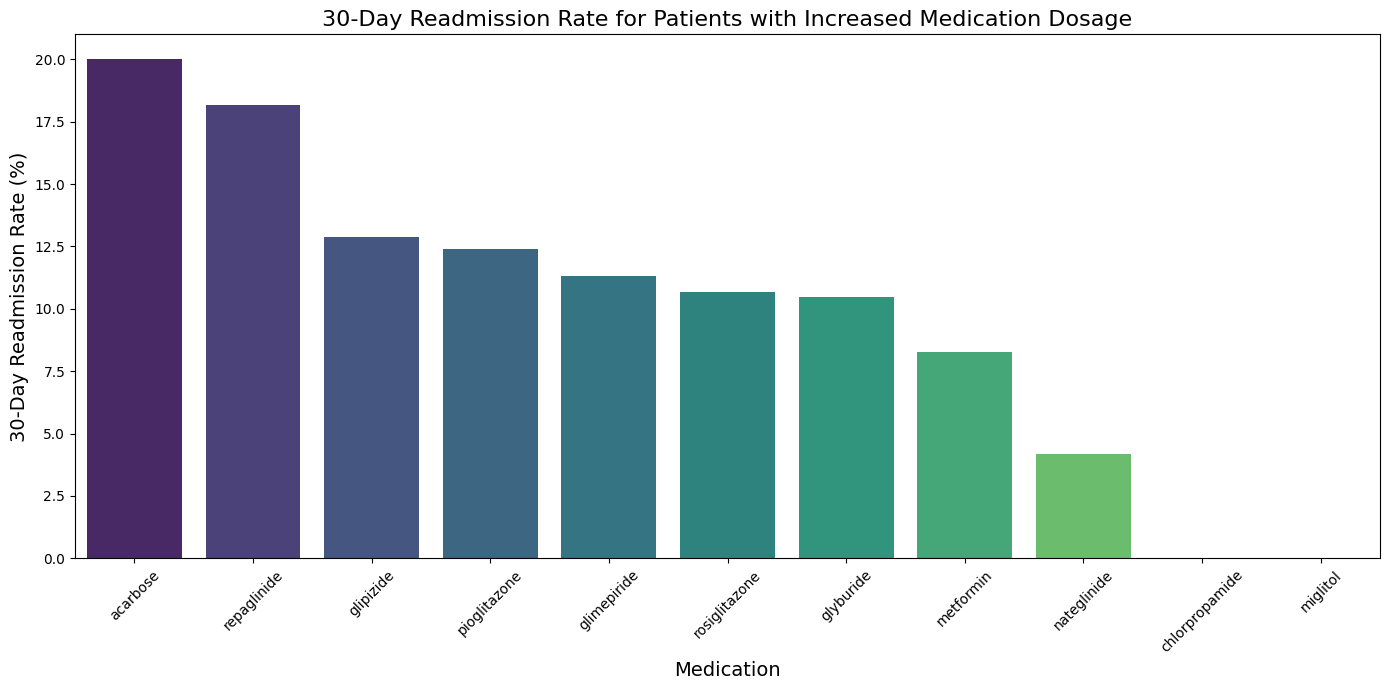

In [111]:
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol']

med_readmission_rates = {}
for med in med_columns:
    # Filtering data for patients with increased dosage
    med_up_data = data[data[med] == 'Up']
    if len(med_up_data) > 0:
        # Calculating 30-day readmission rate
        med_readmission_rates[med] = (med_up_data['readmitted_binary'].mean() * 100).round(2)

# Creating a DataFrame for easier plotting
if med_readmission_rates:
    med_rates_df = pd.DataFrame(list(med_readmission_rates.items()), columns=['Medication', 'Readmission_Rate'])
    med_rates_df = med_rates_df.sort_values('Readmission_Rate', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Medication', y='Readmission_Rate', data=med_rates_df, palette='viridis')
    plt.title('30-Day Readmission Rate for Patients with Increased Medication Dosage', fontsize=16)
    plt.xlabel('Medication', fontsize=14)
    plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Previous visists to readmitted column

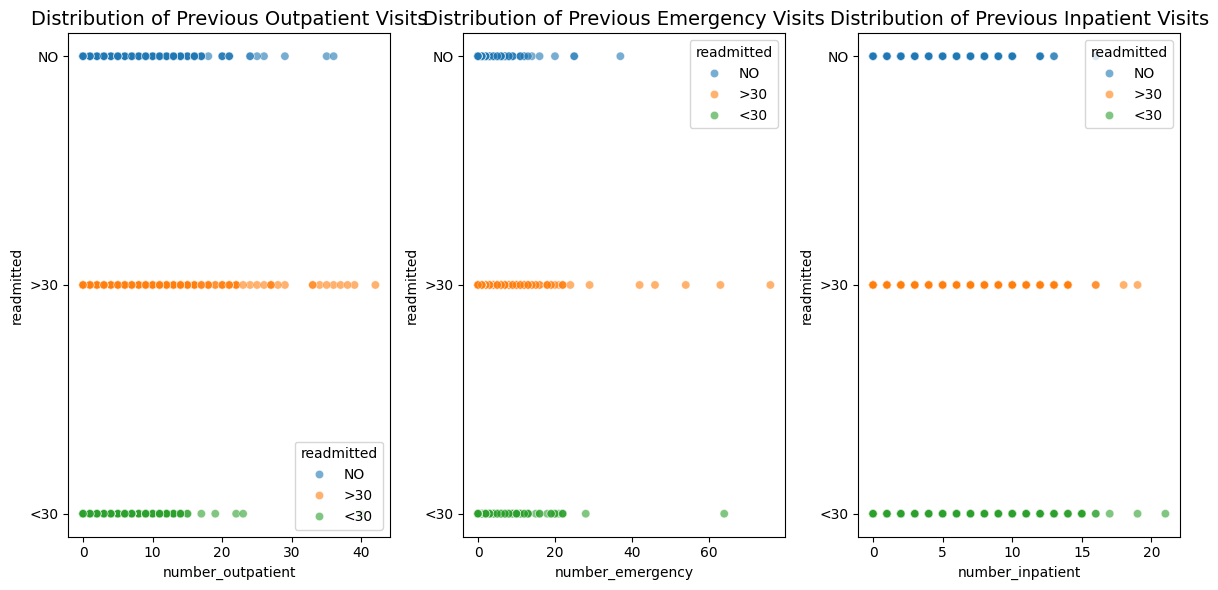

In [112]:

plt.figure(figsize=(12, 6))

# Scatter plot with readmitted status as color/hue
plt.subplot(1, 3, 1)
plt.title('Distribution of Previous Outpatient Visits', fontsize=14)
sns.scatterplot(x=data["number_outpatient"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)

# Scatter plot with readmitted status as color/hue
plt.subplot(1, 3, 2)
plt.title('Distribution of Previous Emergency Visits', fontsize=14)
sns.scatterplot(x=data["number_emergency"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)

plt.subplot(1, 3, 3)
plt.title('Distribution of Previous Inpatient Visits', fontsize=14)
sns.scatterplot(x=data["number_inpatient"], 
                y=data["readmitted"], 
                hue=data["readmitted"], 
                alpha=0.6)


plt.tight_layout()
plt.show()

### Seeing the relation between the payer code and readmission

C:\Users\Farah Weaam\AppData\Local\Temp\ipykernel_8824\236932566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payer_readmission.index, y=payer_readmission['<30_days_rate'], palette='viridis')


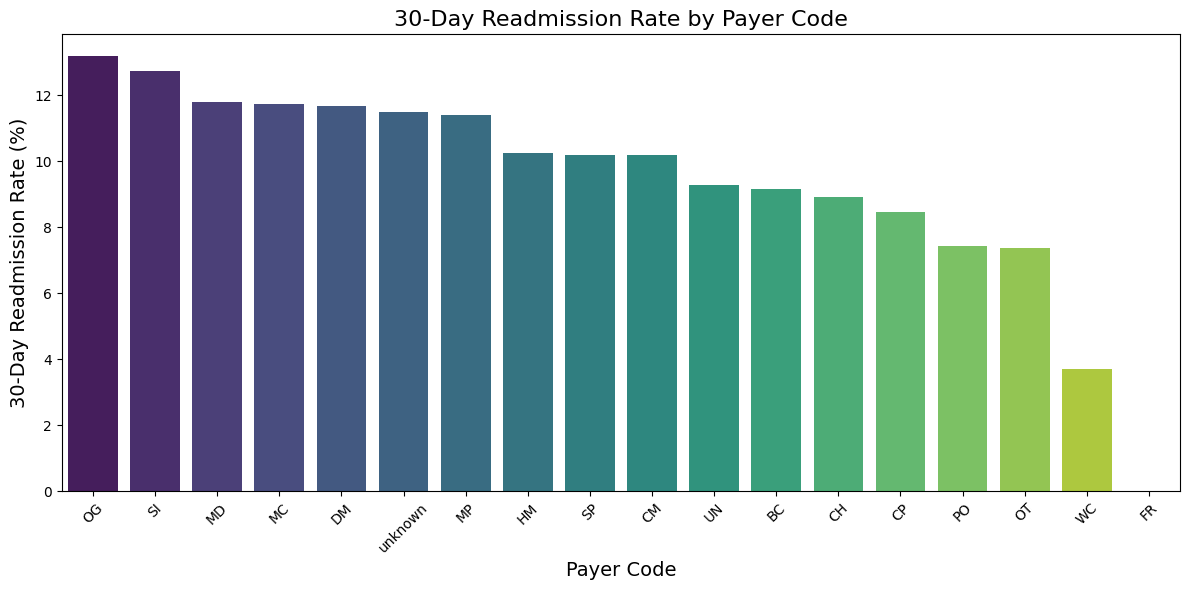

In [113]:
top_payers = data['payer_code'].value_counts().nlargest(25).index

payer_data = data[data['payer_code'].isin(top_payers)]
payer_readmission = calculate_readmission_rate(payer_data, 'payer_code')
payer_readmission = payer_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=payer_readmission.index, y=payer_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Payer Code', fontsize=16)
plt.xlabel('Payer Code', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation matrix

In [ ]:
'''readmitted_mapping = {
    '<30': '1',
    '>30': '2',
    'NO': "0"
}

data['readmitted_mapped'] = data['readmitted'].map(readmitted_mapping)'''

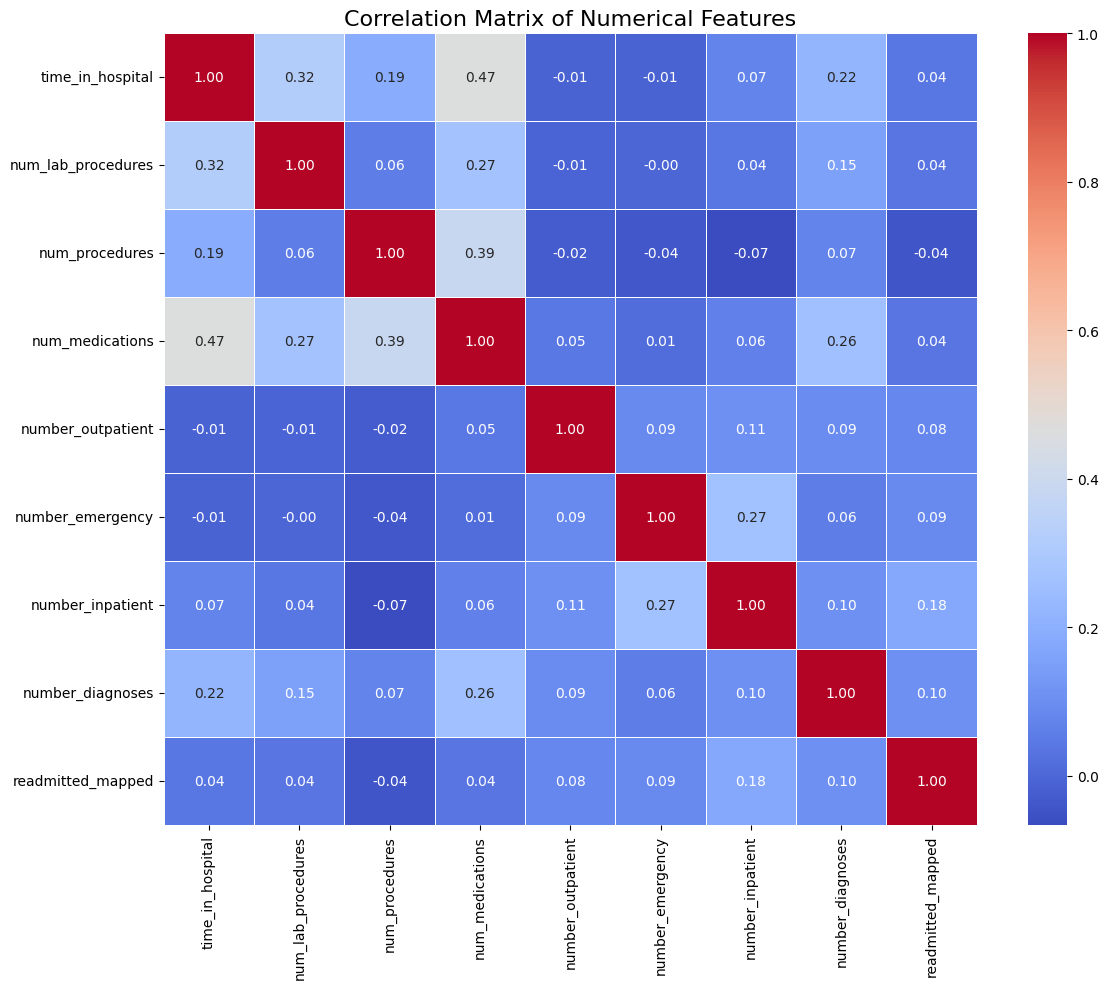

In [ ]:
'''ArithmeticError
# Selecting numerical features
numerical_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses', "readmitted_mapped"
]

# Creating correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
'''

In [114]:
# Task 3: Encode categorical features (Label Encoding)
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
  data[column] = le.fit_transform(data[column])

In [115]:
#One-hot encoding for categorical variables
categorical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'race', 'gender', 'age', 'payer_code', 'medical_specialty', 
                    'A1Cresult', 'max_glu_serum', 'change', 'diabetesMed', 'readmitted']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = onehot_encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=onehot_encoder.get_feature_names_out(categorical_cols))

In [116]:
# Drop original columns and concatenate one-hot encoded columns
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_df], axis=1)


In [117]:
# Task 2: Remove outliers using IQR method
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]


In [118]:
# Task 3: Standardize numerical columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [119]:
data.head()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,A1Cresult_1,A1Cresult_2,A1Cresult_3,max_glu_serum_1,max_glu_serum_2,max_glu_serum_3,change_1,diabetesMed_1,readmitted_1,readmitted_2
14,-1.681887,-0.203644,-1.143650,0.280342,2.764890,-1.863048,0.0,0.0,-0.506026,0.044065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833307,0.58318,1.230148,-0.994052
18,-1.681631,1.228770,0.385662,-0.445213,2.764890,1.401281,0.0,0.0,-0.506026,-0.554416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833307,0.58318,1.230148,-0.994052
36,-1.679422,1.006155,-0.378994,-0.548864,-0.094142,-0.930383,0.0,0.0,-0.506026,-1.936015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833307,0.58318,-0.812910,1.005984
48,-1.677440,0.799226,0.767989,1.109548,2.764890,0.779504,0.0,0.0,-0.506026,-0.497114,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200037,0.58318,-0.812910,1.005984
51,-1.677007,0.354629,0.385662,0.021215,2.764890,-0.153161,0.0,0.0,-0.506026,2.253351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833307,0.58318,1.230148,-0.994052
